importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

importing the data

In [ ]:
dataset= pd.read_csv('./HousePrices.csv',index_col='Id')


In [ ]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
for column in dataset.columns:
  print(column)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
dataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

missing data

In [ ]:
var_na = []
for column in dataset.columns:
    if dataset[column].isnull().sum() != 0:
        var_na.append(column)
for var in var_na:
    print(var,np.round(dataset[var].isnull().mean(),3),'% Missing values')

LotFrontage 0.177 % Missing values
Alley 0.938 % Missing values
MasVnrType 0.005 % Missing values
MasVnrArea 0.005 % Missing values
BsmtQual 0.025 % Missing values
BsmtCond 0.025 % Missing values
BsmtExposure 0.026 % Missing values
BsmtFinType1 0.025 % Missing values
BsmtFinType2 0.026 % Missing values
Electrical 0.001 % Missing values
FireplaceQu 0.473 % Missing values
GarageType 0.055 % Missing values
GarageYrBlt 0.055 % Missing values
GarageFinish 0.055 % Missing values
GarageQual 0.055 % Missing values
GarageCond 0.055 % Missing values
PoolQC 0.995 % Missing values
Fence 0.808 % Missing values
MiscFeature 0.963 % Missing values


categorical and numerical

In [ ]:
categorical_var = []
numerical_var = []
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        categorical_var.append(column)
    else:
        numerical_var.append(column)
print( 'Total Numerical variables are',len(numerical_var))
print( 'Total Categorical variables are',len(categorical_var))

Total Numerical variables are 37
Total Categorical variables are 43


**1 numerical **

In [ ]:
dataset[numerical_var].head()
# dataset.info()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
dataset[numerical_var].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

temporal data analysis

In [ ]:
numerical_var

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:

# Temporal data - Related to Date,Time,Year
# Let's Find how many temporal var are present in our dataset

# List of temporal data 
year_var=[feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature]
print(year_var)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


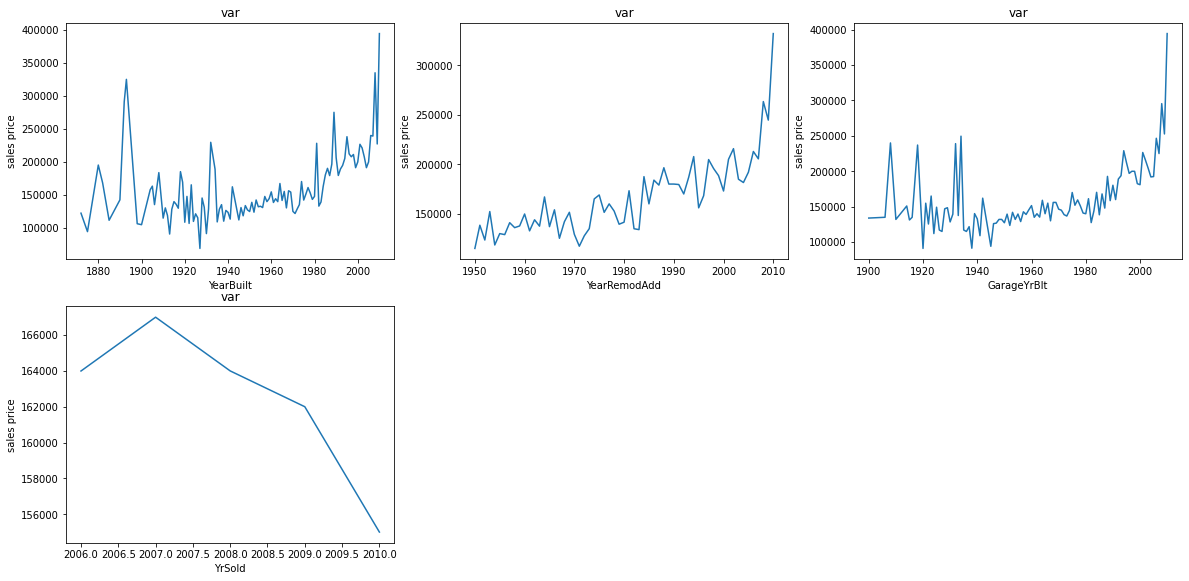

In [ ]:
#relation between temporal data and sales price
df=dataset.copy()
plt.figure(figsize=(20,20))
i=1
for var in year_var:
  plt.subplot(4,3,i)
  
  df.groupby(var)['SalePrice'].median().plot()
  plt.title('var')
  plt.ylabel('sales price')
  i+=1
  
plt.show()

relationship between age of house and sales price

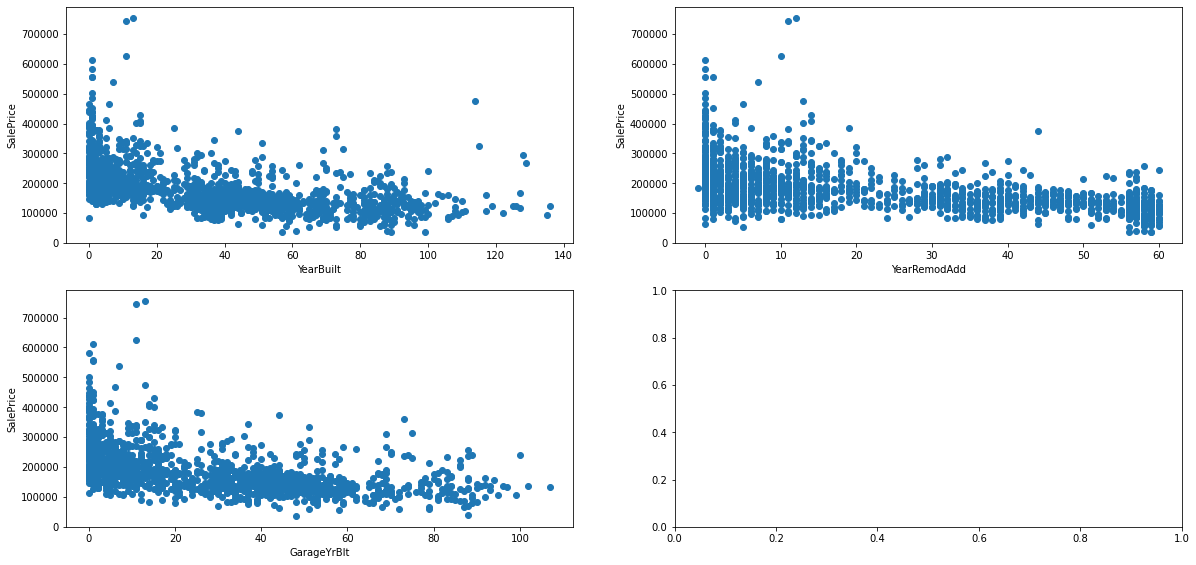

In [ ]:
plt.figure(figsize=(20,20))
i=1
for var in year_var:
  df=dataset.copy()
  plt.subplot(4,2,i)
  if var != 'YrSold':
   df[var]= df['YrSold']-df[var]
   plt.scatter(x=var,y='SalePrice',data=df)
   plt.xlabel(var)
   plt.ylabel('SalePrice') 
   i+=1
plt.show()



conclusion:
(1)if  age is increasing price is decreasing

relation between monthsold and sales price

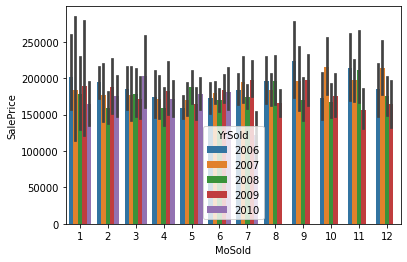

In [ ]:
#sns.set_theme()
#plt.subplot(2,1,1)
sns.barplot(x = 'MoSold',y = 'SalePrice',data = dataset,hue='YrSold')

conclusion:house price does not depend much on month sold

discrete variables

In [ ]:
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 25 and var not in year_var]

print('Total Discrete variables :',len(discrete_var))

for var in discrete_var:
    print(var,'has',len(df[var].unique()),'discrete values.')

Total Discrete variables : 17
MSSubClass has 15 discrete values.
OverallQual has 10 discrete values.
OverallCond has 9 discrete values.
LowQualFinSF has 24 discrete values.
BsmtFullBath has 4 discrete values.
BsmtHalfBath has 3 discrete values.
FullBath has 4 discrete values.
HalfBath has 3 discrete values.
BedroomAbvGr has 8 discrete values.
KitchenAbvGr has 4 discrete values.
TotRmsAbvGrd has 12 discrete values.
Fireplaces has 4 discrete values.
GarageCars has 5 discrete values.
3SsnPorch has 20 discrete values.
PoolArea has 8 discrete values.
MiscVal has 21 discrete values.
MoSold has 12 discrete values.


relation between discrete variable and sales price

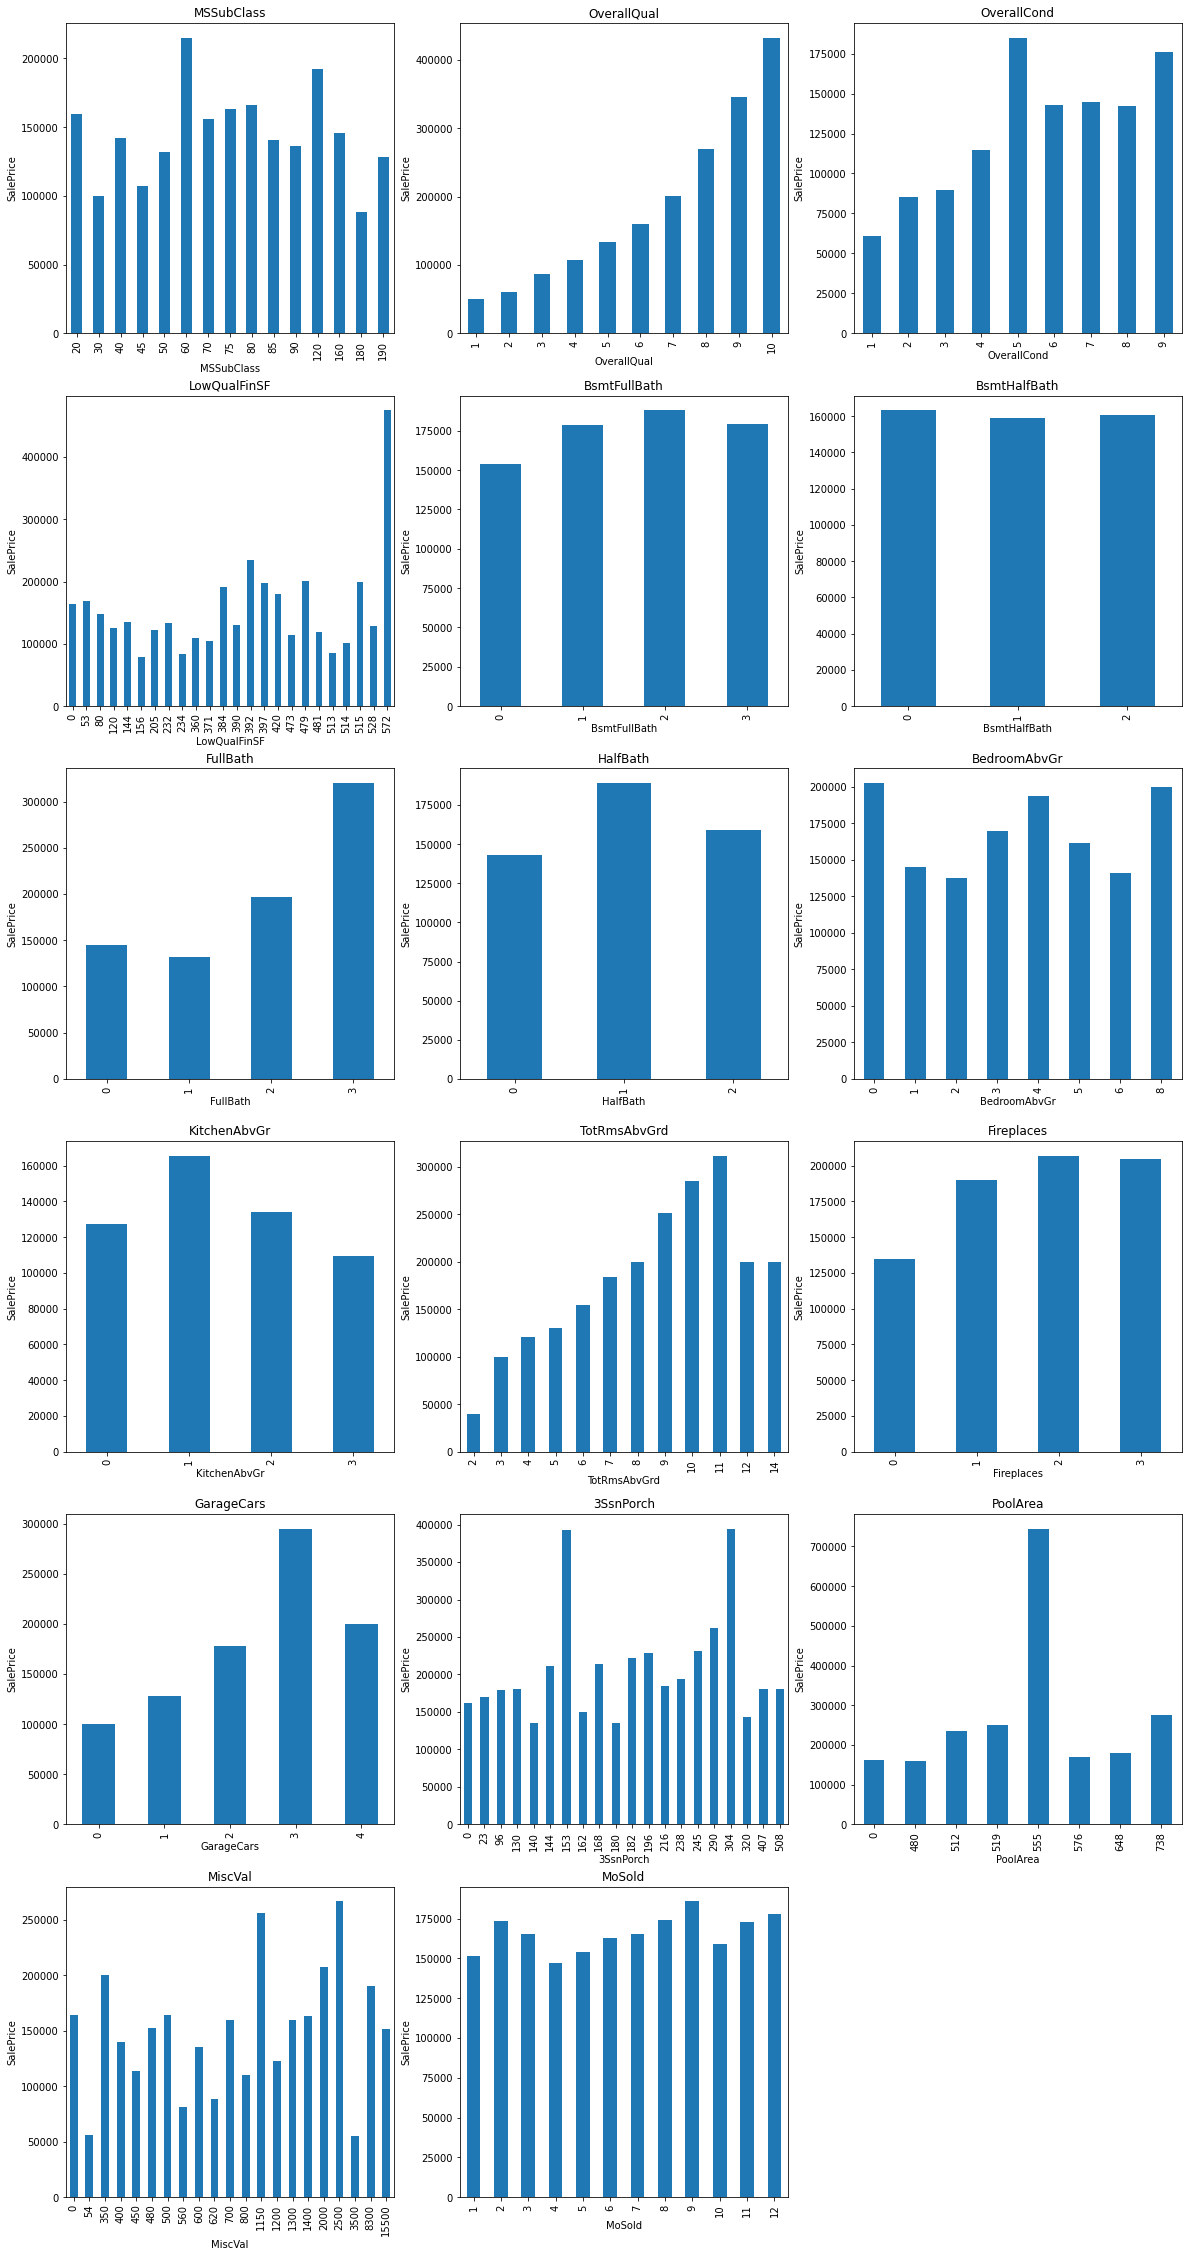

In [ ]:
plt.figure(figsize=(20,40))
i=1
for var in discrete_var:
    plt.subplot(6,3,i)
    var, df.groupby(var)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(var)
    i+=1
    #plt.bar(var,'SalePrice',4)
    
plt.show()

continuous variable

In [ ]:
continuous_var=[var for var in numerical_var if var not in discrete_var+year_var]
print('Total Continuous variables :',len(continuous_var))

Total Continuous variables : 16


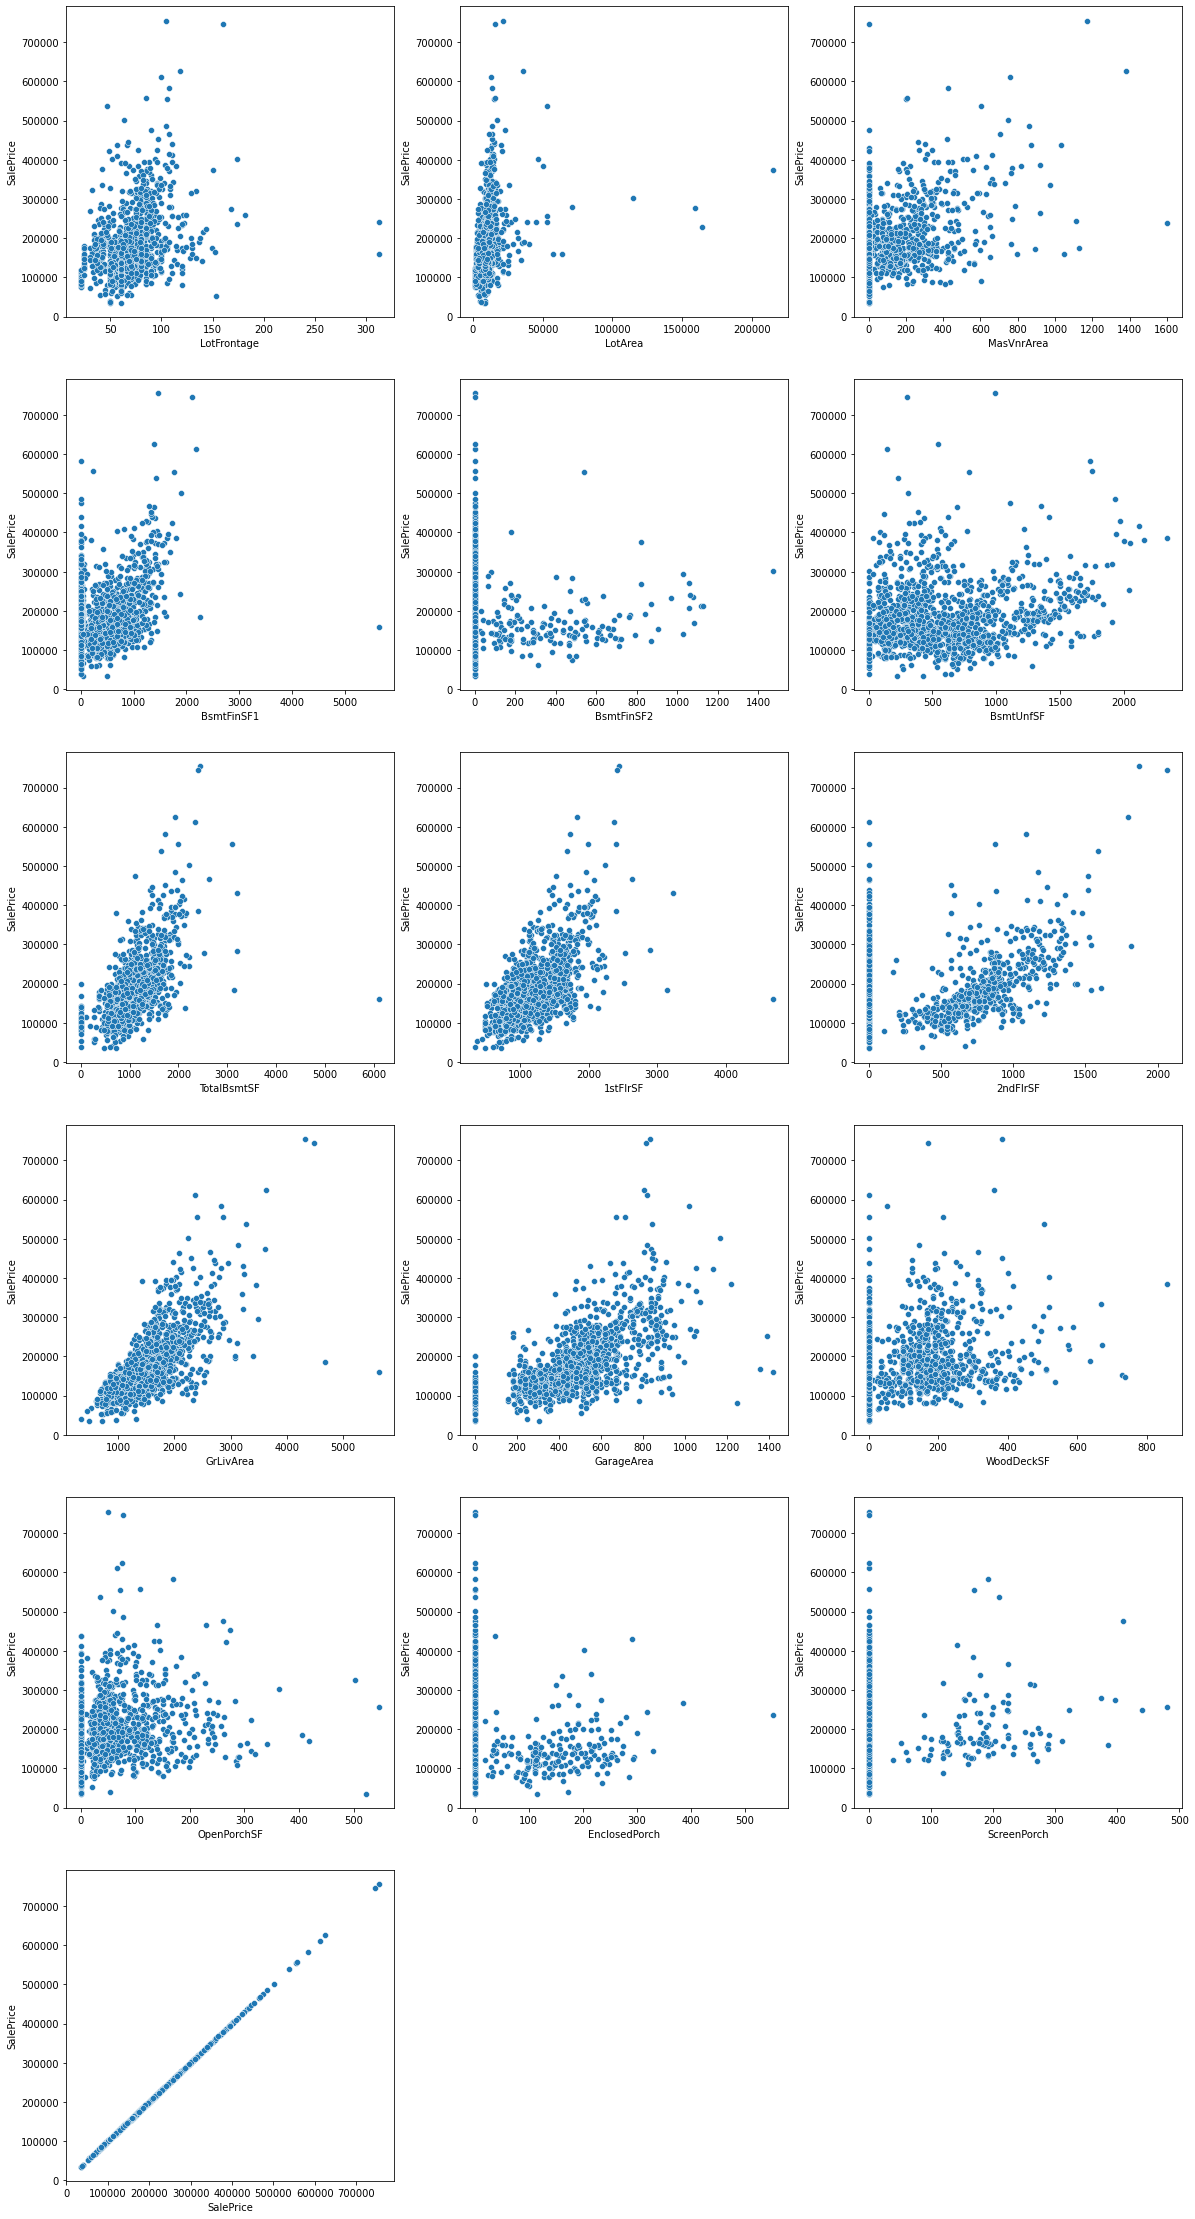

In [ ]:
#plot continuous variable
plt.figure(figsize=(20,40))
i=1
for var in continuous_var :
  plt.subplot(6,3,i)
  sns.scatterplot(x=var, y ='SalePrice',data=df)
 
  i+=1
plt.show()  

histplots of continuous variables

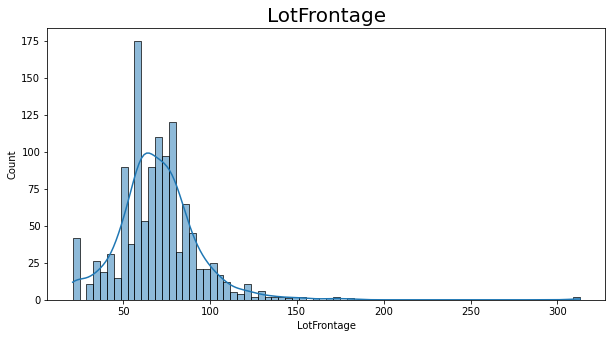

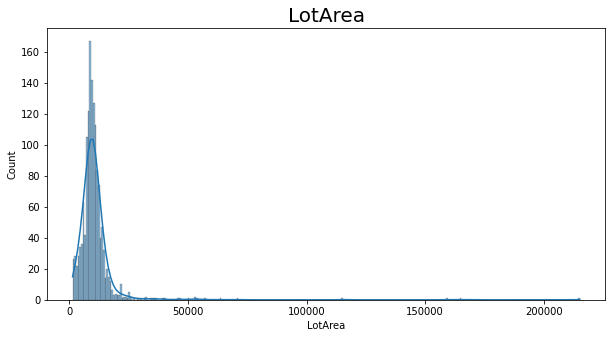

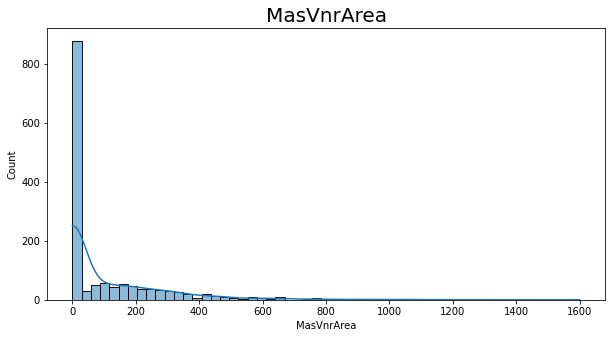

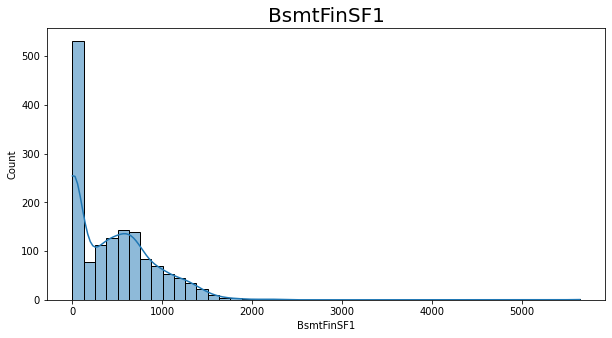

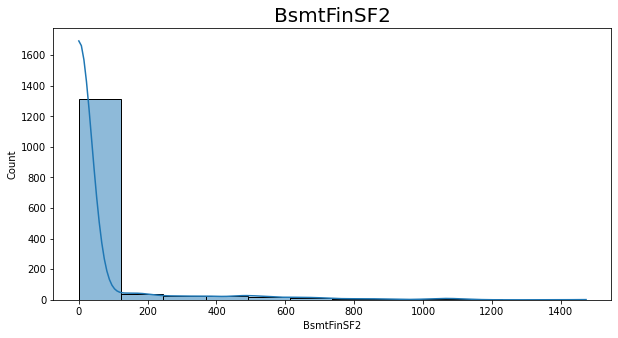

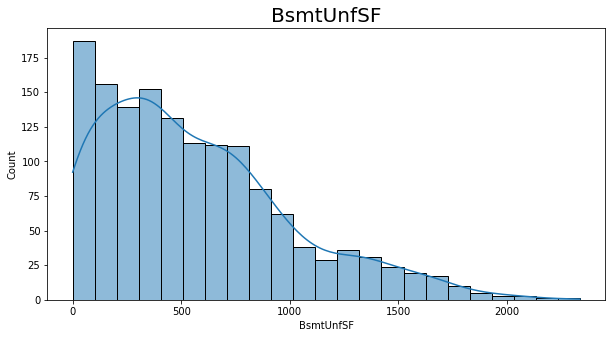

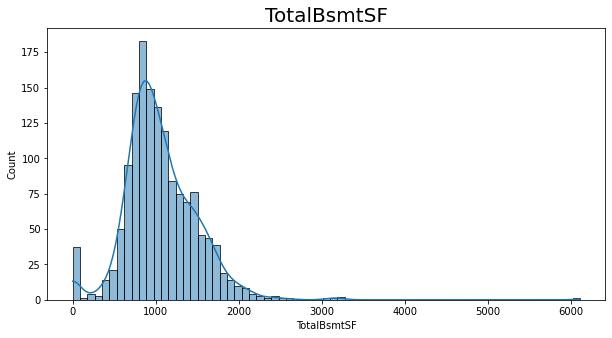

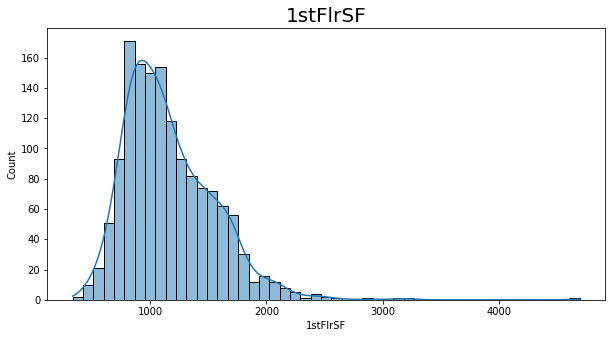

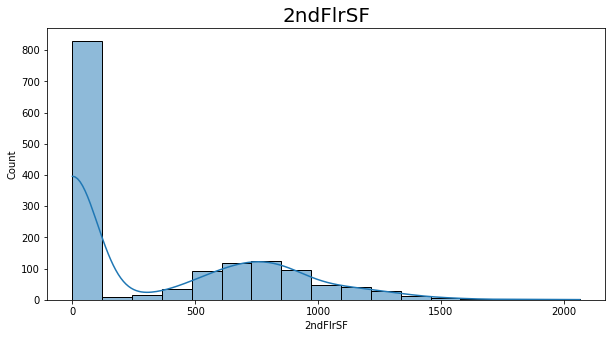

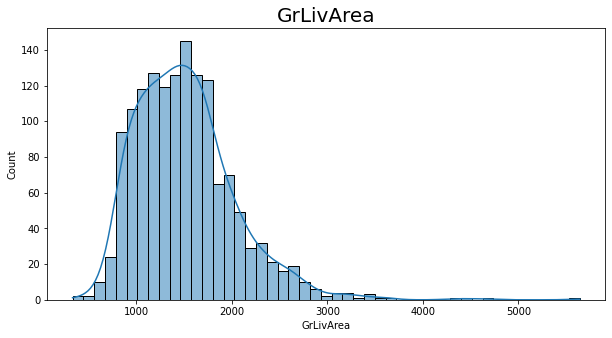

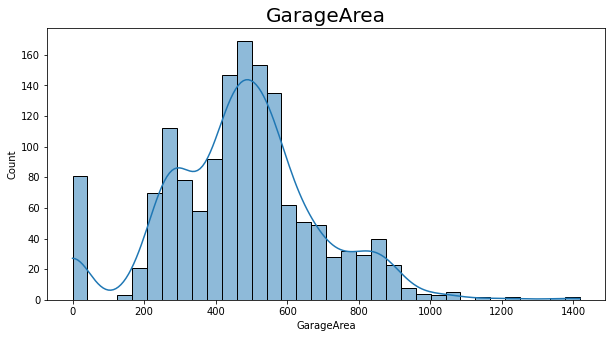

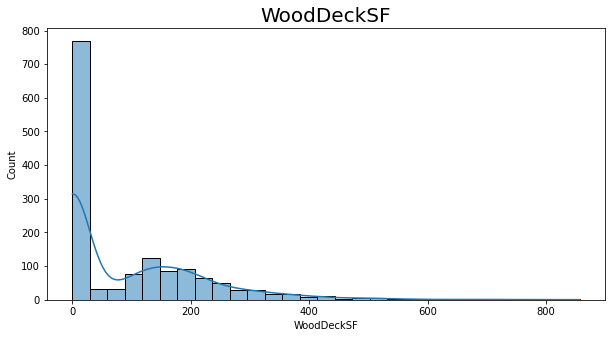

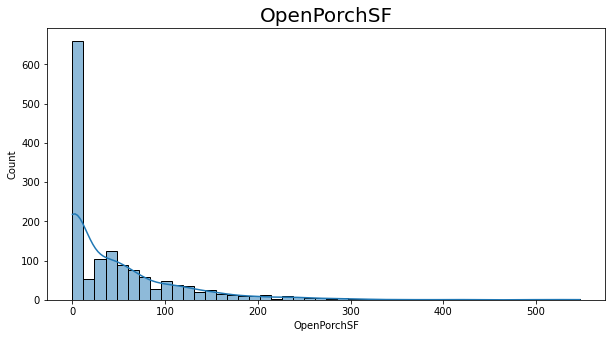

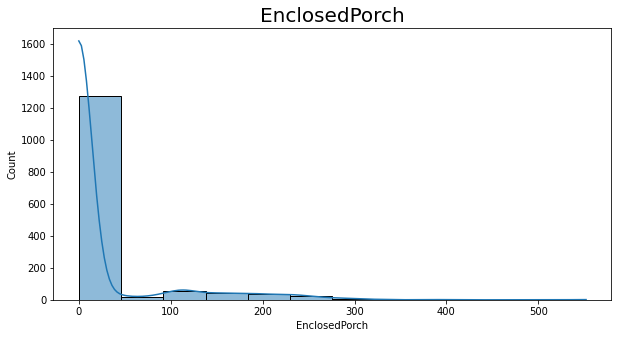

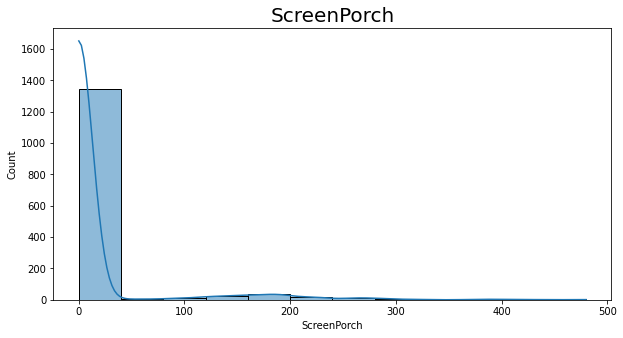

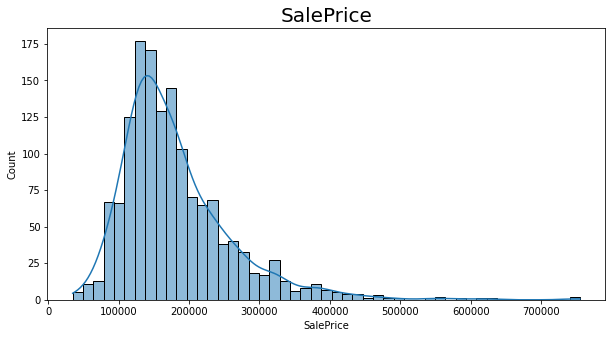

In [ ]:


for var in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(dataset[var],kde=True)
  plt.title(var, fontsize=20) 
  plt.show()

outliers

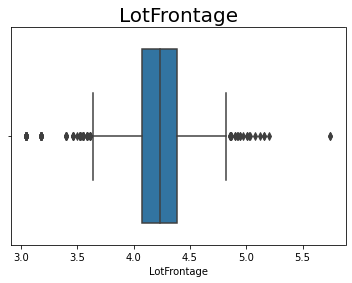

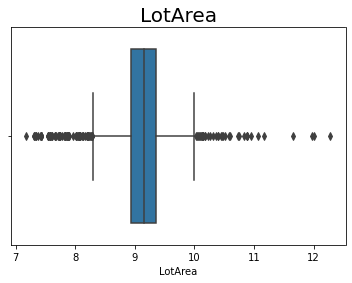

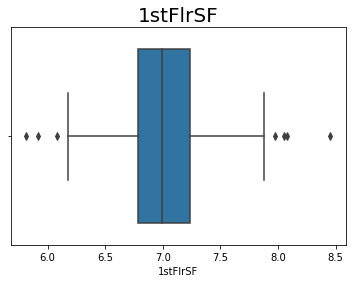

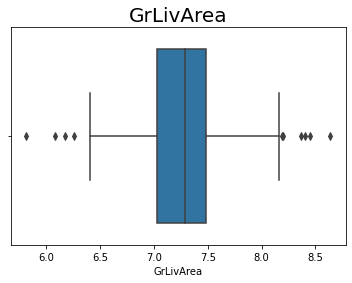

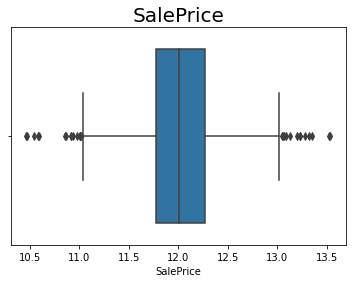

In [ ]:
for var in continuous_var:
    df = dataset.copy()
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        sns.boxplot(x = var,data=df)
        plt.title(var, fontsize = 20)
        plt.show()

categorical data

In [ ]:
dataset[categorical_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
print(len(categorical_var))

43


In [ ]:
#counting the unique values
for var in categorical_var:
  print(var,'has',len(df[var].unique()),'unique values')


MSZoning has 5 unique values
Street has 2 unique values
Alley has 3 unique values
LotShape has 4 unique values
LandContour has 4 unique values
Utilities has 2 unique values
LotConfig has 5 unique values
LandSlope has 3 unique values
Neighborhood has 25 unique values
Condition1 has 9 unique values
Condition2 has 8 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
MasVnrType has 5 unique values
ExterQual has 4 unique values
ExterCond has 5 unique values
Foundation has 6 unique values
BsmtQual has 5 unique values
BsmtCond has 5 unique values
BsmtExposure has 5 unique values
BsmtFinType1 has 7 unique values
BsmtFinType2 has 7 unique values
Heating has 6 unique values
HeatingQC has 5 unique values
CentralAir has 2 unique values
Electrical has 6 unique values
KitchenQual has 4 unique values
Functional has 7 unique values
FireplaceQu has 6 unique

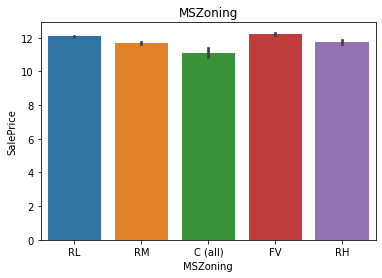

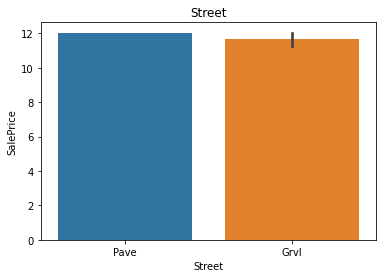

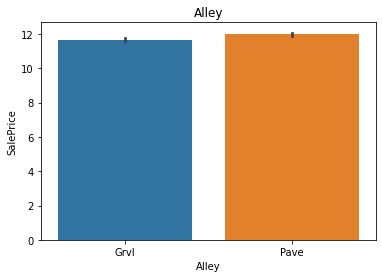

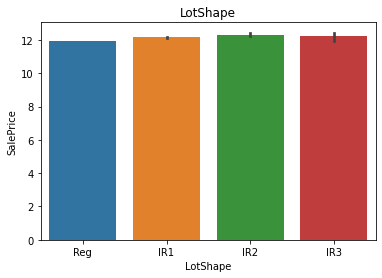

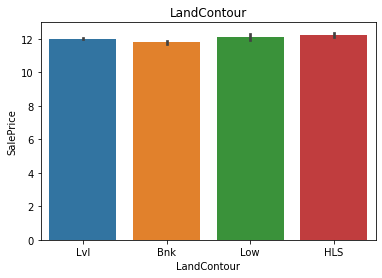

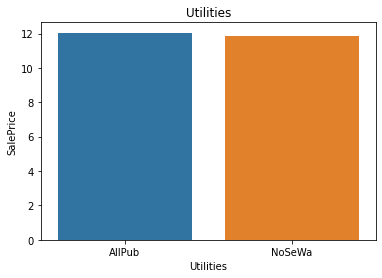

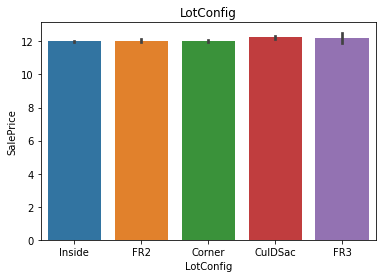

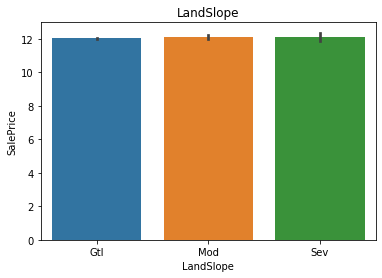

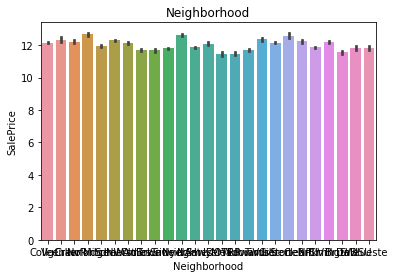

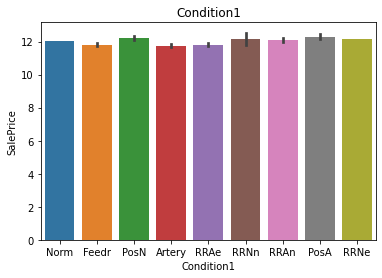

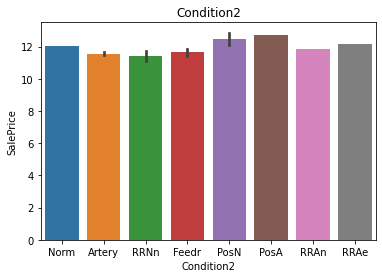

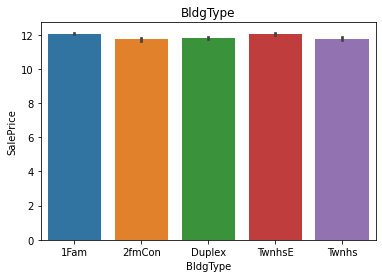

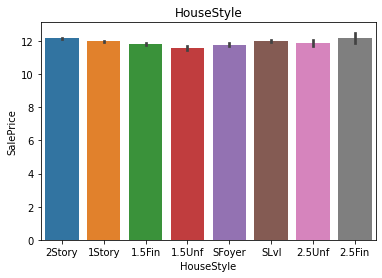

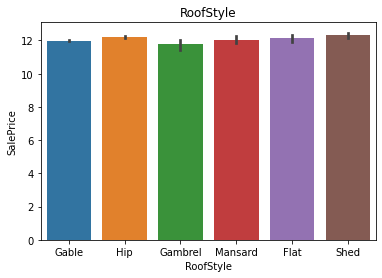

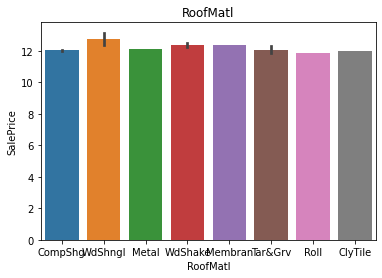

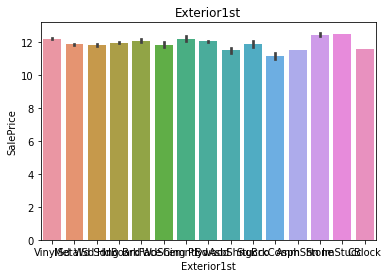

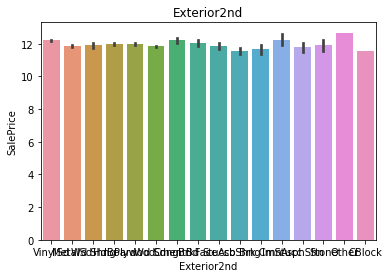

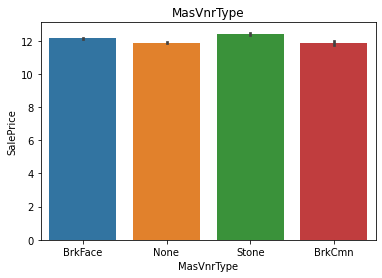

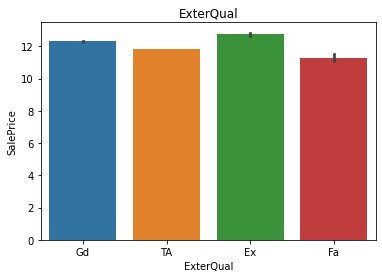

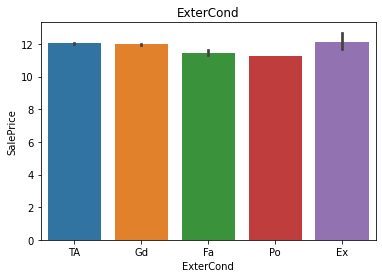

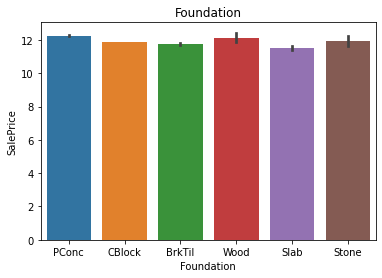

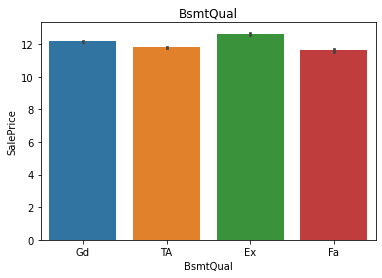

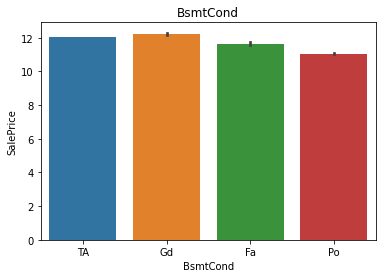

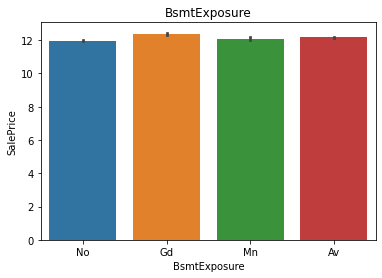

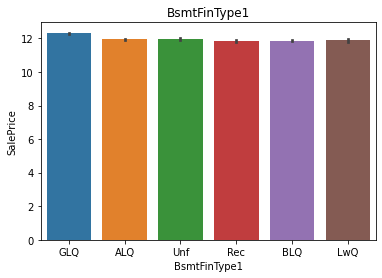

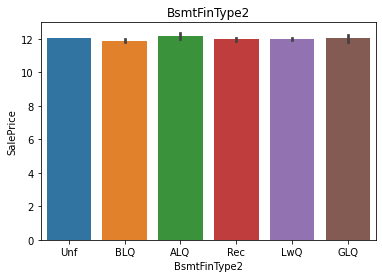

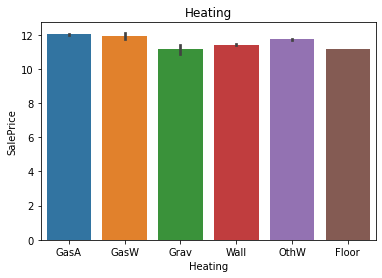

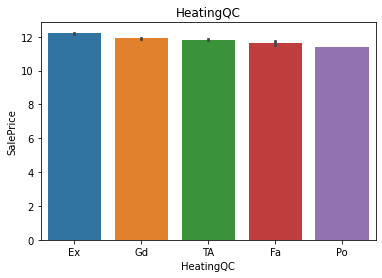

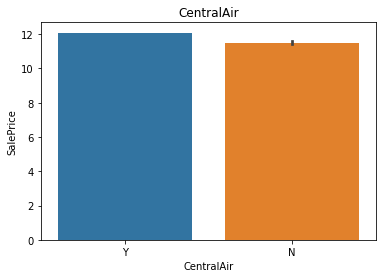

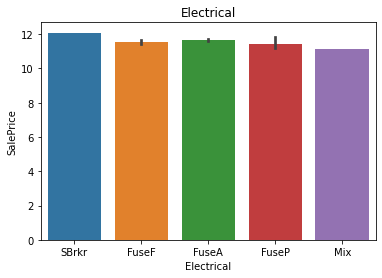

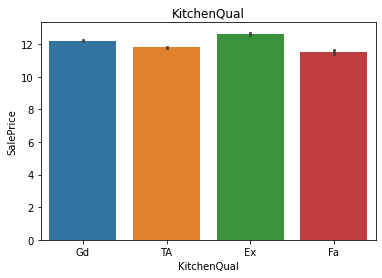

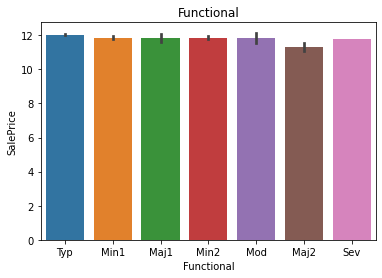

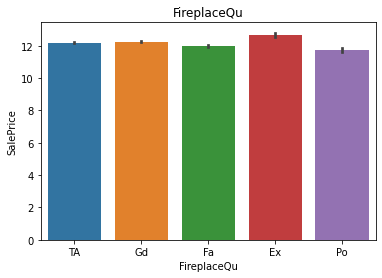

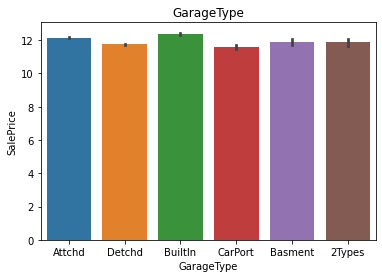

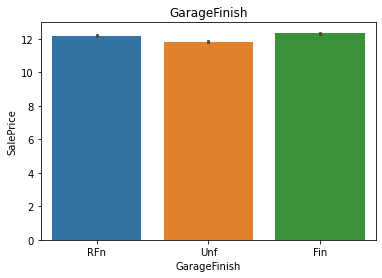

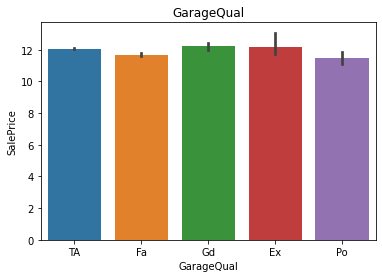

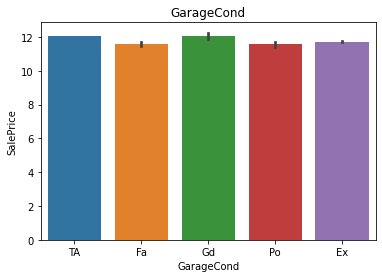

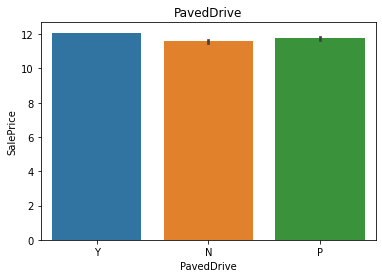

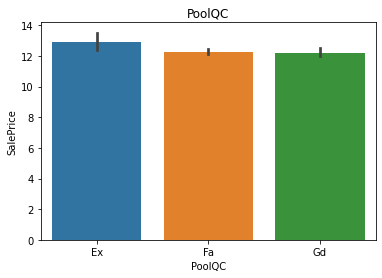

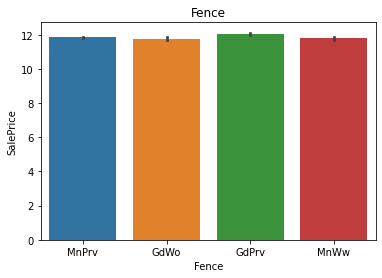

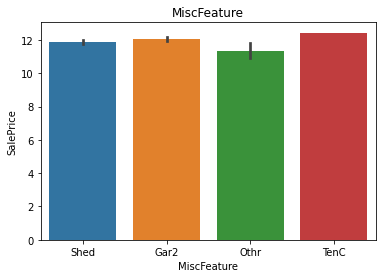

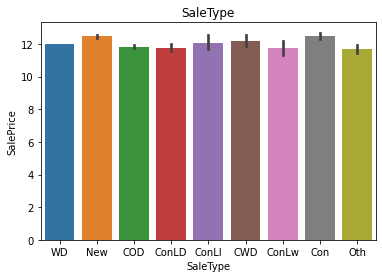

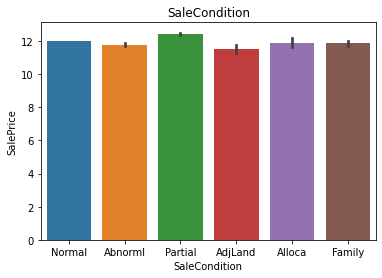

In [ ]:

#plotting the categorical data with sales price
#plt.figure(figsize=(20,40))
#i=1
for var in categorical_var:
  #plt.subplot(11,4,i)
  sns.barplot(x=var,y='SalePrice',data=df)
  plt.title(var)
  #i=+1
  plt.show()

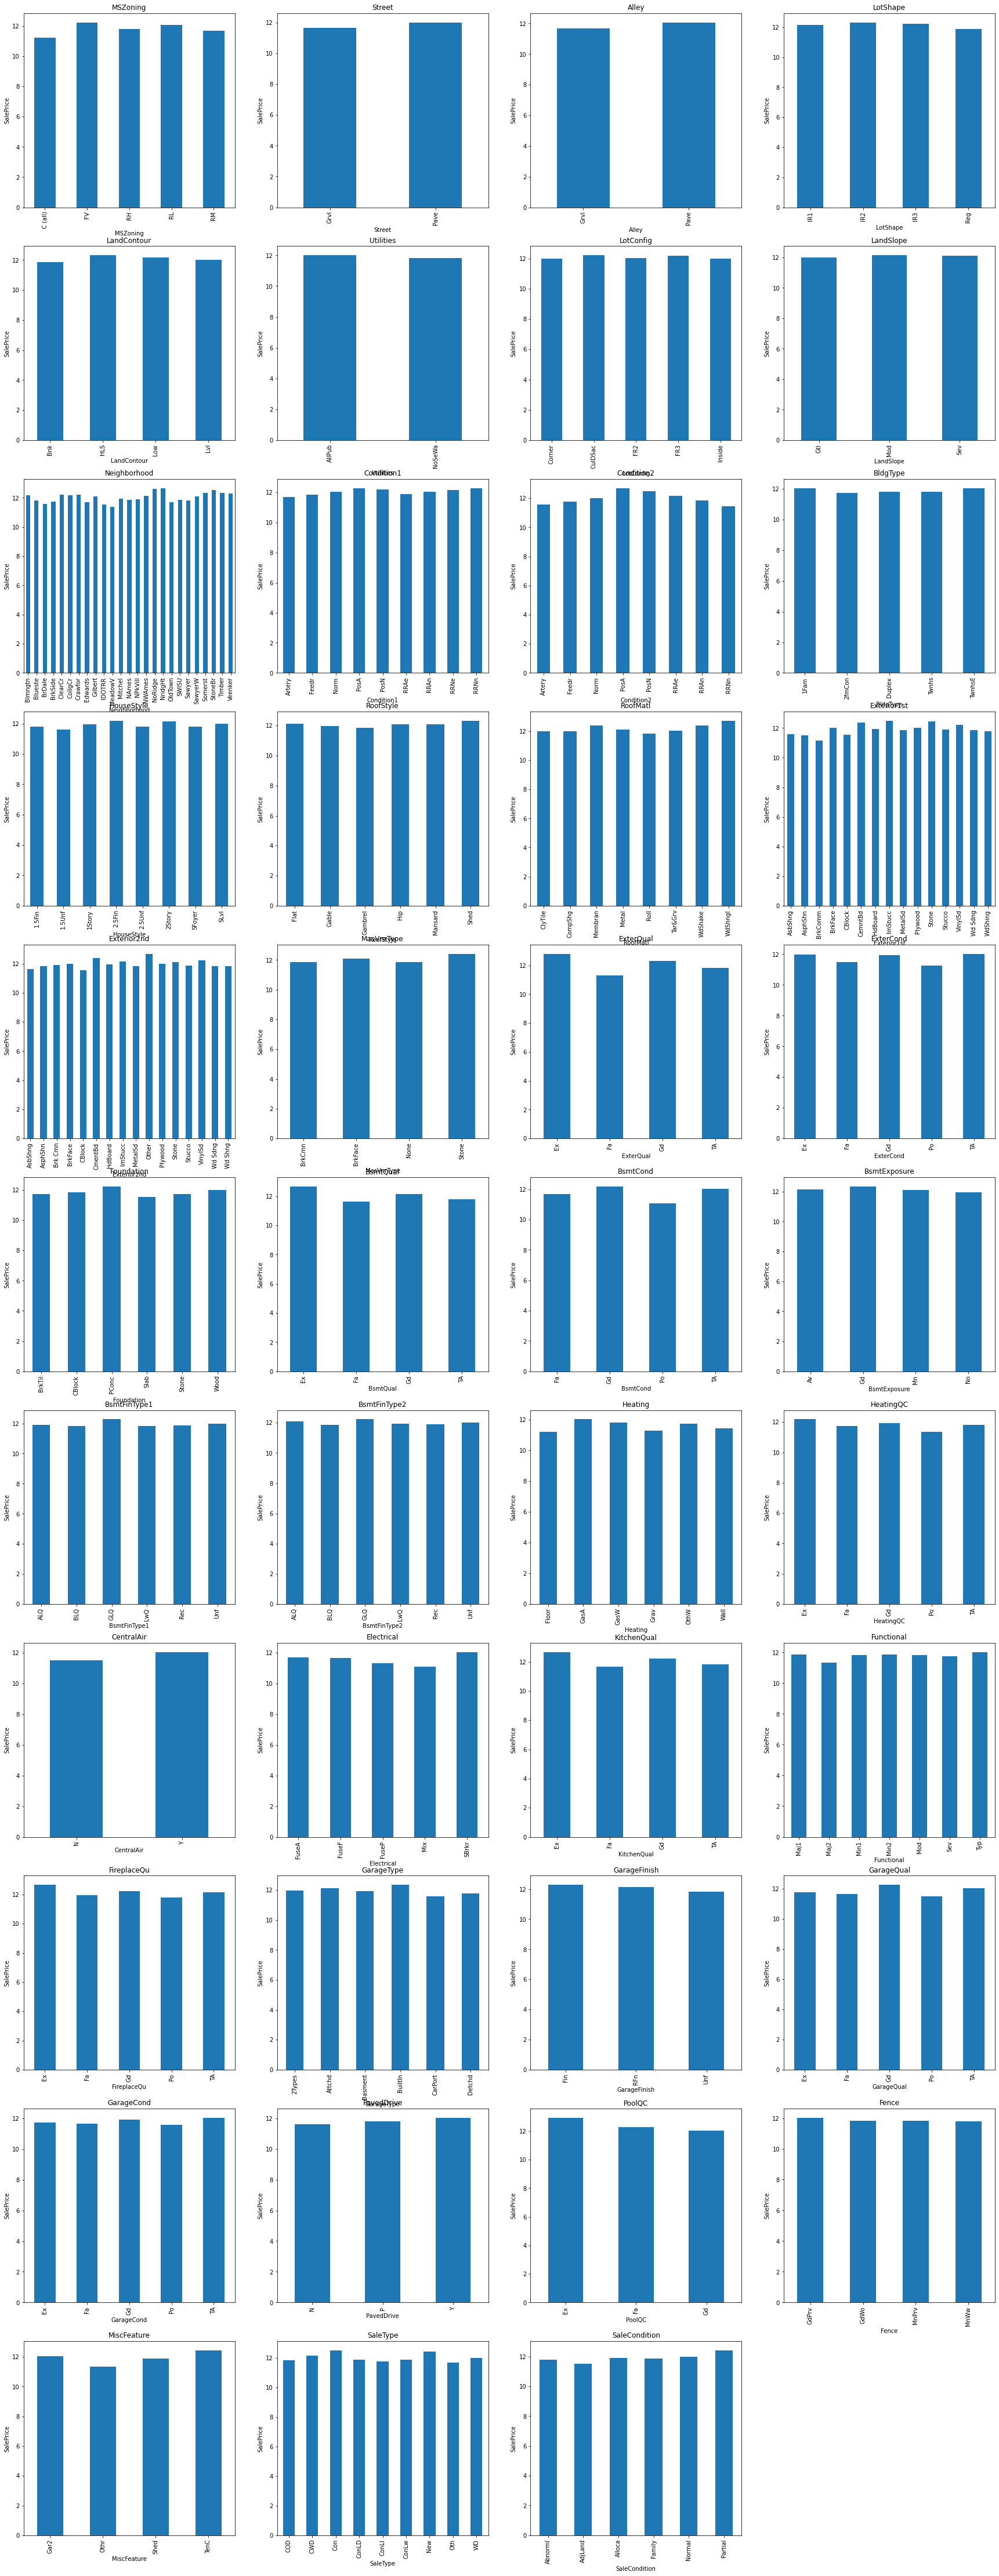

In [ ]:
plt.figure(figsize=(30,80))
i=1
for var in categorical_var:
    plt.subplot(11,4,i)
    var, df.groupby(var)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(var)
    i+=1
    #plt.bar(var,'SalePrice',4)
    
plt.show()

handling missing values

In [ ]:
#categorical
catvar_na=[var for var in dataset.columns if dataset[var].isnull().sum()>0 and dataset[var].dtypes=='O']




In [ ]:
for var in catvar_na:
  print('{} has missing values of {} %'.format(var,np.round(dataset[var].isnull().mean(),3)*100))

Alley has missing values of 93.8 %
MasVnrType has missing values of 0.5 %
BsmtQual has missing values of 2.5 %
BsmtCond has missing values of 2.5 %
BsmtExposure has missing values of 2.6 %
BsmtFinType1 has missing values of 2.5 %
BsmtFinType2 has missing values of 2.6 %
Electrical has missing values of 0.1 %
FireplaceQu has missing values of 47.3 %
GarageType has missing values of 5.5 %
GarageFinish has missing values of 5.5 %
GarageQual has missing values of 5.5 %
GarageCond has missing values of 5.5 %
PoolQC has missing values of 99.5 %
Fence has missing values of 80.80000000000001 %
MiscFeature has missing values of 96.3 %


In [ ]:
print(catvar_na)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
#dropping the column whose missing values are more than 80% 
data1 = dataset.copy()
data1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
print(catvar_na)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
# Remove Alley, PoolQC, Fence, MiscFeature from catvar_na
catvar_na.remove('Alley')
catvar_na.remove('PoolQC')
catvar_na.remove('Fence')
catvar_na.remove('MiscFeature')

In [ ]:
# Remaining are replace by mode
for var in catvar_na:
    data1[var].fillna(data1[var].mode()[0], inplace= True)

In [ ]:
data1[catvar_na].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

numerical data

In [ ]:
numer_na=[var for var in dataset if dataset[var].isnull().sum()>0 and dataset[var].dtype!='O']
print(numer_na)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
for var in numer_na :
  print(var,' has missing values of',((dataset[var].isnull().sum())/len(dataset.MSSubClass))*100 )

LotFrontage  has missing values of 17.73972602739726
MasVnrArea  has missing values of 0.547945205479452
GarageYrBlt  has missing values of 5.5479452054794525


In [ ]:
for var in numer_na:
  data1[var].fillna(df[var].mean(),inplace=True)

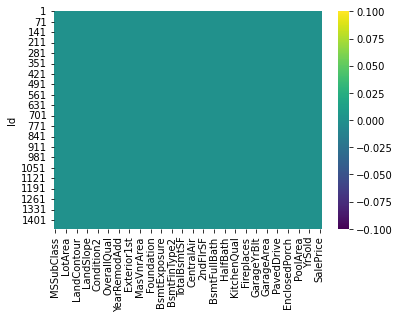

In [ ]:
sns.heatmap(data1.isnull(),cmap='viridis')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## data modelling

In [ ]:
X= data1.iloc[ : , : -1]
Y= data1.iloc[ : ,-1].values


In [ ]:
col_lst=[]
for col in X.columns.values:
 col_lst.append(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()
X=oe.fit_transform(X)
Y=le.fit_transform(Y)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
X = pd.DataFrame(X,columns=col_lst)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5.0,3.0,36.0,327.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,104.0,53.0,1.0,1.0,12.0,13.0,1.0,129.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,361.0,5.0,0.0,73.0,179.0,1.0,0.0,1.0,4.0,134.0,232.0,0.0,531.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,0.0,2.0,1.0,90.0,1.0,2.0,220.0,4.0,4.0,2.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,52.0,498.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,5.0,7.0,77.0,26.0,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,482.0,5.0,0.0,167.0,441.0,1.0,0.0,1.0,4.0,427.0,0.0,0.0,259.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,4.0,6.0,1.0,4.0,1.0,62.0,1.0,2.0,149.0,4.0,4.0,2.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,39.0,702.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,102.0,52.0,1.0,1.0,12.0,13.0,1.0,105.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,222.0,5.0,0.0,278.0,214.0,1.0,0.0,1.0,4.0,178.0,239.0,0.0,570.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,4.0,6.0,1.0,4.0,1.0,88.0,1.0,2.0,260.0,4.0,4.0,2.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,31.0,489.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,6.0,4.0,19.0,20.0,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,66.0,5.0,0.0,346.0,117.0,1.0,2.0,1.0,4.0,208.0,180.0,0.0,536.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,5.0,6.0,1.0,2.0,5.0,85.0,2.0,3.0,284.0,4.0,4.0,2.0,0.0,24.0,108.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,56.0,925.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,7.0,4.0,101.0,50.0,1.0,1.0,12.0,13.0,1.0,222.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,328.0,5.0,0.0,318.0,370.0,1.0,0.0,1.0,4.0,347.0,320.0,0.0,734.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,7.0,6.0,1.0,4.0,1.0,87.0,1.0,3.0,380.0,4.0,4.0,2.0,118.0,70.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1168, 75) (292, 75) (1168,) (292,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
(pred).reshape(-1,1)

array([[ 403.30762827],
       [ 332.97919855],
       [  76.70110982],
       [  47.80472821],
       [ 190.97244468],
       [ 587.43196837],
       [ 525.28979748],
       [ 268.95466063],
       [ 430.98411476],
       [ 509.58921768],
       [ 359.2246723 ],
       [ -98.2878479 ],
       [ 398.1315769 ],
       [ 601.11212493],
       [ 455.79888818],
       [ 101.17636625],
       [  76.82186108],
       [ 127.36938863],
       [ 476.65747085],
       [ 151.7127648 ],
       [ 138.34352397],
       [ 125.08366428],
       [ 448.34481485],
       [ 616.19725681],
       [  66.08246801],
       [ 407.53139559],
       [ 222.56089191],
       [ 322.74315531],
       [ 671.34975439],
       [ 118.7228703 ],
       [ 109.49576555],
       [ 128.34414653],
       [ 122.11427169],
       [  65.00472557],
       [ 252.46736239],
       [ 639.02315522],
       [ 176.84092747],
       [  34.97089871],
       [ 484.66472544],
       [  96.07738029],
       [ 184.71635847],
       [ 209.682

In [ ]:
Y_test.reshape(-1,1)

array([[459],
       [330],
       [128],
       [ 36],
       [198],
       [594],
       [554],
       [235],
       [380],
       [541],
       [314],
       [ 11],
       [311],
       [627],
       [457],
       [ 42],
       [137],
       [ 66],
       [513],
       [203],
       [134],
       [129],
       [469],
       [602],
       [ 22],
       [359],
       [144],
       [327],
       [653],
       [129],
       [ 82],
       [113],
       [142],
       [ 28],
       [239],
       [612],
       [158],
       [ 40],
       [517],
       [101],
       [155],
       [188],
       [ 42],
       [171],
       [337],
       [274],
       [110],
       [263],
       [485],
       [561],
       [ 62],
       [562],
       [124],
       [474],
       [376],
       [106],
       [120],
       [335],
       [113],
       [323],
       [288],
       [528],
       [ 31],
       [164],
       [288],
       [160],
       [171],
       [490],
       [265],
       [210],
       [393],
      

In [ ]:
ans=0
for i in range(len(pred)):
  ans+=(pred[i]-Y_test[i])**2
  print(pred[i],Y_test[i])


403.30762826693024 459
332.9791985488771 330
76.70110982090276 128
47.80472821235614 36
190.9724446771952 198
587.4319683745459 594
525.2897974770689 554
268.9546606339881 235
430.98411476426793 380
509.5892176769968 541
359.22467230002934 314
-98.28784790124547 11
398.13157689879745 311
601.1121249270948 627
455.7988881823103 457
101.17636624879918 42
76.82186108431671 137
127.36938863106928 66
476.65747084593886 513
151.71276479762423 203
138.34352396635194 134
125.08366428208802 129
448.3448148480501 469
616.1972568051686 602
66.08246800733195 22
407.5313955948395 359
222.5608919133192 144
322.7431553078531 327
671.3497543917284 653
118.72287029666029 129
109.4957655455897 82
128.34414652655803 113
122.11427169272017 142
65.00472557065041 28
252.4673623933694 239
639.0231552167243 612
176.8409274666032 158
34.97089870990263 40
484.6647254406606 517
96.07738028788071 101
184.71635847431764 155
209.68223732269075 188
107.08667534216616 42
146.66764706681988 171
310.7737757578586 337
3

In [ ]:
import math
math.sqrt(ans)/len(pred)

2.8582802751811505

In [ ]:
(reg.coef_)

array([-2.62247761e-01, -1.46456673e+01, -1.72092097e-01,  3.82946636e-02,
        3.94359118e+01, -2.45434441e+00,  2.91162445e+00, -6.38694289e+01,
       -1.23791019e-01,  1.94349771e+01, -2.68523720e-01,  6.50460289e-01,
       -1.15423030e+01, -3.23331809e+00,  3.55375663e-01,  2.10611460e+01,
        1.46299621e+01,  9.43074221e-01,  4.41988016e-01,  9.38441915e-01,
        1.53513188e+00, -1.68517928e+00,  1.56567536e+00,  3.69818305e+00,
       -1.43392236e-02, -6.50254586e+00,  2.02777571e+00,  1.82630038e+00,
       -2.33788494e+00,  3.18236015e+00, -2.22549506e+00, -1.49650435e+00,
        9.26682876e-04,  4.81468439e-01, -4.26186197e-02, -3.21755857e-02,
        1.36391014e-01, -3.78427579e+00, -3.95757136e+00, -1.19205913e+01,
       -2.44930380e+00,  3.53493016e-02,  6.60416710e-02,  1.86728103e-01,
        2.26108521e-01,  1.21365736e+01, -1.57880129e+00,  1.55297526e+01,
        2.49190470e+00, -3.80697391e+00, -5.75596187e+01, -7.86607430e+00,
       -3.00797633e+00,  

In [ ]:
reg.intercept_


-115.26983746904159